<a href="https://colab.research.google.com/github/fayashi06/RandomForestRegressor-/blob/main/Digital_Twins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Timestamp": [
        "2022-09-01 00:00", "2022-09-01 00:00",
        "2022-09-01 00:15", "2022-09-01 00:15",
        "2022-09-01 00:30", "2022-09-01 00:30"
    ],
    "SensorID": ["S01", "S02", "S01", "S02", "S01", "S02"],
    "Location": [
        "Inlet Cold Aisle", "Hot Aisle Exit",
        "Inlet Cold Aisle", "Hot Aisle Exit",
        "Inlet Cold Aisle", "Hot Aisle Exit"
    ],
    "Temperature": [21.3, 34.7, 21.5, 35.1, 21.2, 32.8],
    "Airflow": [1.25, 0.85, 1.27, 0.89, 1.22, 0.92],
    "CaseID": ["Base", "Base", "Base", "Base", "Retrofitted", "Retrofitted"]
}

df = pd.DataFrame(data)

# Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df


,Timestamp,SensorID,Location,Temperature,Airflow,CaseID
0,2022-09-01 00:00:00,S01,Inlet Cold Aisle,21.3,1.25,Base
1,2022-09-01 00:00:00,S02,Hot Aisle Exit,34.7,0.85,Base
2,2022-09-01 00:15:00,S01,Inlet Cold Aisle,21.5,1.27,Base
3,2022-09-01 00:15:00,S02,Hot Aisle Exit,35.1,0.89,Base
4,2022-09-01 00:30:00,S01,Inlet Cold Aisle,21.2,1.22,Retrofitted
5,2022-09-01 00:30:00,S02,Hot Aisle Exit,32.8,0.92,Retrofitted


In [83]:
df

,Timestamp,SensorID,Location,Temperature,Airflow,CaseID
0,2022-09-01 00:00:00,S01,Inlet Cold Aisle,21.3,1.25,Base
1,2022-09-01 00:00:00,S02,Hot Aisle Exit,34.7,0.85,Base
2,2022-09-01 00:15:00,S01,Inlet Cold Aisle,21.5,1.27,Base
3,2022-09-01 00:15:00,S02,Hot Aisle Exit,35.1,0.89,Base
4,2022-09-01 00:30:00,S01,Inlet Cold Aisle,21.2,1.22,Retrofitted
5,2022-09-01 00:30:00,S02,Hot Aisle Exit,32.8,0.92,Retrofitted


In [84]:
X = df.drop('Temperature',axis = 1)
y = df['Temperature'].copy()


In [85]:
df.shape

(6, 6)

In [86]:
df.head() # datamiz kicikdi outlieri olmaz mence nan deyerleri de yoxdur


,Timestamp,SensorID,Location,Temperature,Airflow,CaseID
0,2022-09-01 00:00:00,S01,Inlet Cold Aisle,21.3,1.25,Base
1,2022-09-01 00:00:00,S02,Hot Aisle Exit,34.7,0.85,Base
2,2022-09-01 00:15:00,S01,Inlet Cold Aisle,21.5,1.27,Base
3,2022-09-01 00:15:00,S02,Hot Aisle Exit,35.1,0.89,Base
4,2022-09-01 00:30:00,S01,Inlet Cold Aisle,21.2,1.22,Retrofitted


In [87]:
num_feature = X.select_dtypes(include = np.number).columns
cat_feature = X.select_dtypes(exclude = np.number).columns #ayirdiq ki, ancaq numeric deyerler qalsin

In [88]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2, random_state = 42
) # data kicikdir deye biz regressordan istifade edeceyik,classifier yox.

In [89]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [90]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),

])
cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown = 'ignore'))
])

transformer = ColumnTransformer([
    ('num',num_pipeline,num_feature),
    ('cat',cat_pipeline,cat_feature)
])
full_pipeline = Pipeline([
    ('transformer',transformer),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ))
])
full_pipeline.fit(X_train,y_train)








Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Airflow'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Timestamp', 'SensorID', 'Location', 'CaseID'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [91]:
full_pipeline.score(X_train,y_train)

0.9667762341282121

In [92]:
full_pipeline.score(X_test,y_test)

0.9591271775451093

In [93]:
df

,Timestamp,SensorID,Location,Temperature,Airflow,CaseID
0,2022-09-01 00:00:00,S01,Inlet Cold Aisle,21.3,1.25,Base
1,2022-09-01 00:00:00,S02,Hot Aisle Exit,34.7,0.85,Base
2,2022-09-01 00:15:00,S01,Inlet Cold Aisle,21.5,1.27,Base
3,2022-09-01 00:15:00,S02,Hot Aisle Exit,35.1,0.89,Base
4,2022-09-01 00:30:00,S01,Inlet Cold Aisle,21.2,1.22,Retrofitted
5,2022-09-01 00:30:00,S02,Hot Aisle Exit,32.8,0.92,Retrofitted


In [94]:
y_pred = full_pipeline.predict(X_test)

In [95]:
y_pred

array([22.399, 33.131])

In [100]:
y_test

,Temperature
0,21.3
1,34.7


In [103]:
from sklearn.metrics import mean_squared_error , r2_score,root_mean_squared_error
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)

In [102]:
mse

1.8347810000000417

In [104]:
r2

0.9591271775451093

In [105]:
rmse

np.float64(1.3545408816274398)

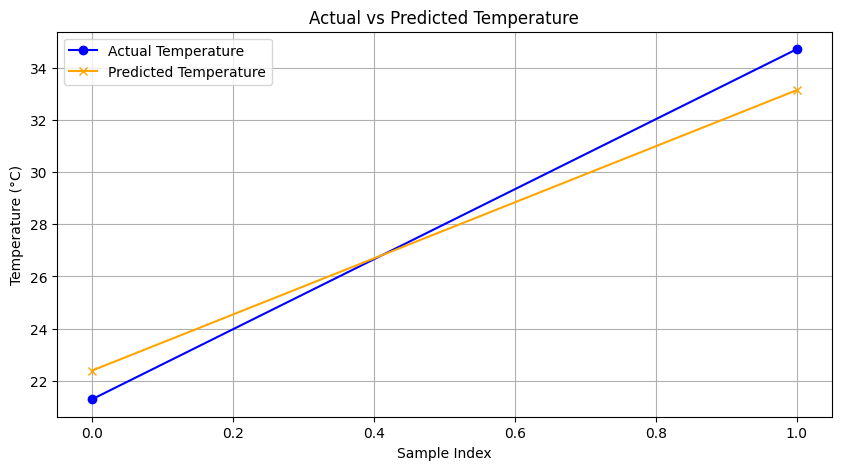

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, marker='o', label='Actual Temperature', color='blue')
plt.plot(y_pred, marker='x', label='Predicted Temperature', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()


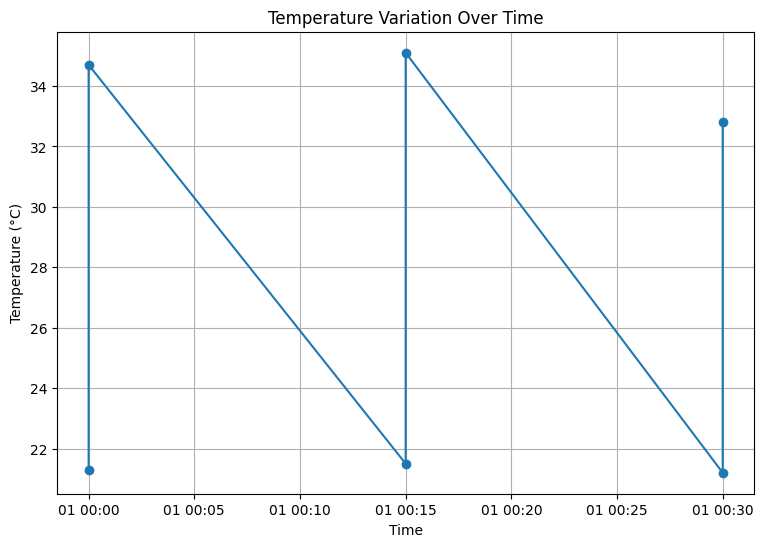

In [115]:

plt.figure(figsize = (9,6))
plt.plot(df["Timestamp"], df["Temperature"], marker='o')
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Variation Over Time")
plt.grid(True)
plt.show()
